# IMDB 영화평 분석

## 지도학습 기반 감성 분석

### 데이터 로딩 및 확인

In [13]:
import pandas as pd

review_df = pd.read_csv('./dataset/labeledTrainData.tsv', header=0, sep='\t')
print(review_df.shape)
review_df.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
review_df['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### 데이터 전처리
- br tag 삭제
- 알파벳이 아닌 문자 삭제

In [14]:
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

In [4]:
review_df['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.  Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.  The actual feature film bit when it finally starts is only on for 2

In [15]:
import re

review_df['review'] = review_df['review'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))  # [^a-zA-Z]: 알파벳이 아닌 것
# re.sub(pattern, replace, text): text 중 pattern에 해당하는 부분을 replace로 대체한다.

In [6]:
review_df['review'][0]

'With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for  

### 학습/평가 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

x = review_df['review']
y = review_df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

### 피처벡터화

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

cnt_vect = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
cnt_vect.fit(x_train)
x_train_cnt_vect = cnt_vect.transform(x_train)
x_test_cnt_vect = cnt_vect.transform(x_test)

### 모델 학습 및 평가

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression(solver='liblinear')
model.fit(x_train_cnt_vect, y_train)
y_hat = model.predict(x_test_cnt_vect)
pred_prob = model.predict_proba(x_test_cnt_vect)[:,1]  # positive의 확률값

print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(f'AUC: {roc_auc_score(y_test, pred_prob):.3f}')

정확도: 0.890
AUC: 0.952


## 비지도학습 기반 감성 분석
- WordNet Synset & SentiWordNet SentiSynset 클래스 이용
- nltk의 모든 데이터 셋과 패키지 다운로드

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

### WordNet의 주요 기능 확인
  - WordNet은 symentic(문맥상 의미)분석을 제공하는 어휘 사전
  - synsets(): 하나의 단어가 가질 수 있는 여러가지 시맨틱 정보를 Synset 객체로 반환
  - Synset 객체 형식: aaaa.b.c --> aaaa-단어이름, b-품사, c-같은 품사 그룹의 인덱스

In [2]:
from nltk.corpus import wordnet as wn

term = 'present'
synsets = wn.synsets(term)
print(type(synsets), len(synsets))
print(synsets)

<class 'list'> 18
[Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [3]:
for synset in synsets:
    print(f'Synset Name: {synset.name()}')
    print(f'POS: {synset.lexname()}')
    print(f'Definition: {synset.definition()}')
    print(f'lemma: {synset.lemma_names()}')
    print()

Synset Name: present.n.01
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
lemma: ['present', 'nowadays']

Synset Name: present.n.02
POS: noun.possession
Definition: something presented as a gift
lemma: ['present']

Synset Name: present.n.03
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
lemma: ['present', 'present_tense']

Synset Name: show.v.01
POS: verb.perception
Definition: give an exhibition of to an interested audience
lemma: ['show', 'demo', 'exhibit', 'present', 'demonstrate']

Synset Name: present.v.02
POS: verb.communication
Definition: bring forward and present to the mind
lemma: ['present', 'represent', 'lay_out']

Synset Name: stage.v.01
POS: verb.creation
Definition: perform (a play), especially on a stage
lemma: ['stage', 'present', 'represent']

Synset Name: present.v.04
POS: verb.possession
Definition: hand over formally
lemma: [

- Synset 객체의 path_similarity() 매서드를 통해 단어의 상호 유사도를 확인

In [4]:
import pandas as pd

tree = wn.synset('tree.n.01')   # 'tree'의 명사의 1번 의미
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')  # 'tiger'의 명사의 01번 의미 : 사납거나 대담한 사람
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
sim = []
entity_names = [entity.name().split('.')[0] for entity in entities]  # sysnet객체.name() -> tree.n.01, .으로 분리하여 첫번째 값 가져오기(tree)

for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity),2) for compared_entity in entities] 
    # compared_entity: 비교대상이 되는 entity, path_similarity로 한 entity와 자신포함 다른 entity의 유사도 측정
    sim.append(similarity)

sim_df = pd.DataFrame(sim, columns=entity_names, index=entity_names)
sim_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


### SentiWordNet의 주요 기능
- WordNet과 유사한 기능을 갖는 모듈
- 단어의 감성을 나타내는 `감성지수`와 객관성을 나타내는 `객관성 지수`를 가지고 있다.

In [5]:
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print(type(senti_synsets), len(senti_synsets))
print(senti_synsets)

<class 'list'> 11
[SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [8]:
father = swn.senti_synset('father.n.01')
print(f'긍정감성 지수: {father.pos_score()}')
print(f'부정감성 지수: {father.neg_score()}')
print(f'객관성 지수: {father.obj_score()}')

긍정감성 지수: 0.0
부정감성 지수: 0.0
객관성 지수: 1.0


In [10]:
fabulous = swn.senti_synset('fabulous.a.01')
print(f'긍정감성 지수: {fabulous.pos_score()}')
print(f'부정감성 지수: {fabulous.neg_score()}')
print(f'객관성 지수: {fabulous.obj_score()}')

긍정감성 지수: 0.875
부정감성 지수: 0.125
객관성 지수: 0.0


## SentiWordNet을 이용한 영화감상평 감성분석
- 분석절차
  - (1) 문서를 문장 단위로 분해
  - (2) 문장을 단어 단위로 토큰화
  - (3) 토큰화된 단어의 어근 추출 및 품사 태깅
  - (4) SentiSynset에서 긍정/부정 감성 지수 구하기
  - (5) (4)에서 구한 값을 모두 합산하여 특정 임계치 이상일 경우 긍정으로, 그렇지 않으면 부정으로 분류

- 품사 반환 함수 정의
- POS Table
- 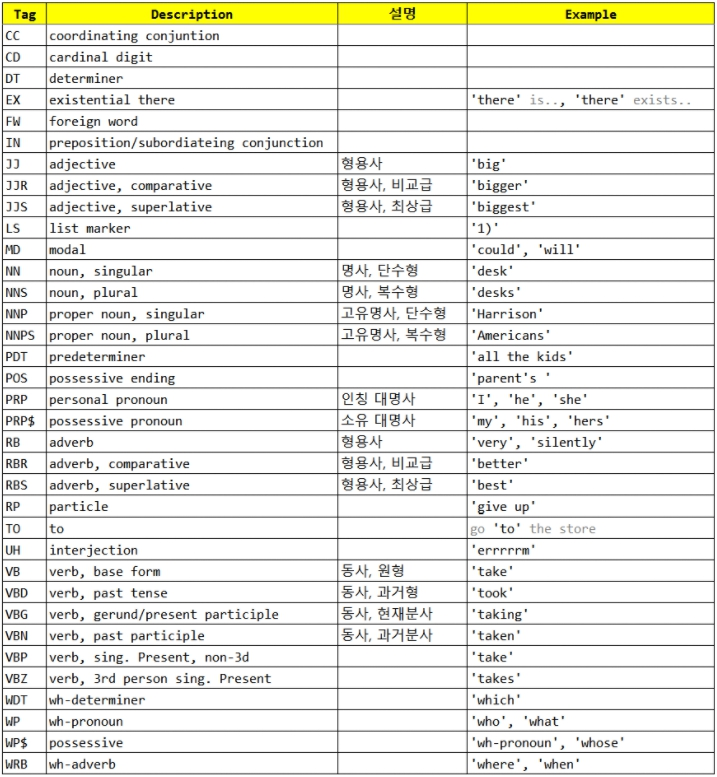

In [11]:
# wordnet의 품사반환함수 정의
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    if tag.startswith('J'):
        # J로 시작하면 형용사로
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

- 감성지수 반환 함수 정의
  - 각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성지수가 0이상일 경우 긍정 감성(1), 그렇지 않을 경우 부정 감성(0) 값을 반환

In [12]:
from nltk.stem import WordNetLemmatizer  # 어근 추출하기 위한 클래스
from nltk.corpus import sentiwordnet as swn 
from nltk import sent_tokenize, word_tokenize, pos_tag  # 문서를 문장단위로, 문장을 단어 단위로 토큰화하기 위한 함수, 품사를 태깅하기 위한 함수

def swn_polarity(text):
    sentiment = 0.0   # 감성 지수 초기화
    token_count = 0

    lemmarizer = WordNetLemmatizer()  # 어근 추출 클래스
    raw_sentences = sent_tokenize(text)  # 감상평 문서를 문장 단위로 분해
    for raw_sentence in raw_sentences:
        # pos_tag(): 품사를 분류하는 함수, 단어와 품사를 갖는 튜플로 반환
        tagged_sentence = pos_tag(word_tokenize(raw_sentence)) # 문장을 단어로 토큰화한 것과 품사를 태깅하여 튜플로
        
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)  # pos_tag()로 분류된 태그값(품사값)을 wordnet에서 제공하는 품사로 변환
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):  
                # 변환된 태그가 네개의 품사에 해당하지 않으면 감성지수값을 받을 수 없기 떄문에 skip 필요
                continue
            lemma = lemmarizer.lemmatize(word, pos=wn_tag)  # 토큰이된 단어와 품사값을 넣어 단어의 어근 찾기
            if not lemma: # 해당하는 어근이 존재하지 않으면 skip
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:  # 워드넷 사전에 포함되지 않으면 skip
                continue
            synset = synsets[0]  # 사전의 첫번째 단어 가져오기
            swn_synset = swn.senti_synset(synset.name())  # 단어의 senti_synset 객체 가져오기
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score()) # 단어의 긍정 지수 - 부정지수한 값 누적합
            token_count += 1

    # 총 score가 0이상일 경우 긍정(1), 그렇지 않으면 부정(0) 반환
    if not token_count:
        return 0

    if sentiment >= 0:
        return 1

    return 0

- swn_polarity() 함수 구조 파악 테스트

In [ ]:
text = review_df['review'][0]
#print(text)

In [20]:
raw_sentences = sent_tokenize(text)
# print(len(raw_sentences))
tagged_sentence = pos_tag(word_tokenize(raw_sentences[0]))
print(tagged_sentence)

[('With', 'IN'), ('all', 'PDT'), ('this', 'DT'), ('stuff', 'NN'), ('going', 'VBG'), ('down', 'RP'), ('at', 'IN'), ('the', 'DT'), ('moment', 'NN'), ('with', 'IN'), ('MJ', 'NNP'), ('i', 'NN'), ('ve', 'NN'), ('started', 'VBD'), ('listening', 'VBG'), ('to', 'TO'), ('his', 'PRP$'), ('music', 'NN'), ('watching', 'VBG'), ('the', 'DT'), ('odd', 'JJ'), ('documentary', 'NN'), ('here', 'RB'), ('and', 'CC'), ('there', 'RB'), ('watched', 'VBD'), ('The', 'DT'), ('Wiz', 'NNP'), ('and', 'CC'), ('watched', 'VBD'), ('Moonwalker', 'NNP'), ('again', 'RB'), ('Maybe', 'RB'), ('i', 'VB'), ('just', 'RB'), ('want', 'VB'), ('to', 'TO'), ('get', 'VB'), ('a', 'DT'), ('certain', 'JJ'), ('insight', 'NN'), ('into', 'IN'), ('this', 'DT'), ('guy', 'NN'), ('who', 'WP'), ('i', 'VBP'), ('thought', 'VBN'), ('was', 'VBD'), ('really', 'RB'), ('cool', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('eighties', 'NNS'), ('just', 'RB'), ('to', 'TO'), ('maybe', 'RB'), ('make', 'VB'), ('up', 'RP'), ('my', 'PRP$'), ('mind', 'NN'), ('whether'

In [22]:
word_list = []
for word, tag in tagged_sentence:
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):  
        continue
    word_list.append((word, wn_tag))

print(word_list)

[('stuff', 'n'), ('going', 'v'), ('down', 'r'), ('moment', 'n'), ('MJ', 'n'), ('i', 'n'), ('ve', 'n'), ('started', 'v'), ('listening', 'v'), ('music', 'n'), ('watching', 'v'), ('odd', 'a'), ('documentary', 'n'), ('here', 'r'), ('there', 'r'), ('watched', 'v'), ('Wiz', 'n'), ('watched', 'v'), ('Moonwalker', 'n'), ('again', 'r'), ('Maybe', 'r'), ('i', 'v'), ('just', 'r'), ('want', 'v'), ('get', 'v'), ('certain', 'a'), ('insight', 'n'), ('guy', 'n'), ('i', 'v'), ('thought', 'v'), ('was', 'v'), ('really', 'r'), ('cool', 'a'), ('eighties', 'n'), ('just', 'r'), ('maybe', 'r'), ('make', 'v'), ('up', 'r'), ('mind', 'n'), ('is', 'v'), ('guilty', 'a'), ('innocent', 'a'), ('Moonwalker', 'n'), ('is', 'v'), ('part', 'n'), ('biography', 'n'), ('part', 'n'), ('feature', 'n'), ('film', 'n'), ('i', 'v'), ('remember', 'v'), ('going', 'v'), ('see', 'v'), ('cinema', 'n'), ('was', 'v'), ('originally', 'r'), ('released', 'v'), ('has', 'v'), ('subtle', 'v'), ('messages', 'n'), ('MJ', 'n'), ('s', 'v'), ('feel

- 리뷰에 대한 감성지수 값을 예측 값으로 계산

In [23]:
review_df['preds'] = review_df['review'].apply(lambda x : swn_polarity(x))

- 예측 정확도 확인

In [24]:
y_target = review_df['sentiment'].values  # 영화 감상평의 감성지수 정답값
y_hat = review_df['preds'].values  # 영화 감상평의 감성지수 예측값

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print(confusion_matrix(y_target, y_hat))
print(f'정확도: {accuracy_score(y_target, y_hat):.3f}')
print(f'정밀도: {precision_score(y_target, y_hat):.3f}')
print(f'재현율: {recall_score(y_target, y_hat):.3f}')

[[ 4186  8314]
 [ 1390 11110]]
정확도: 0.612
정밀도: 0.572
재현율: 0.889
